In [3]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)

print(torch.__version__)
torch.set_default_tensor_type('torch.FloatTensor')

1.4.0


# 多层感知机

## 公式表达

$
\begin{aligned} \boldsymbol{H} &= \boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h,\\ \boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o, \end{aligned}
$

如果做代入展开，那么

$\boldsymbol{O} = (\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h)\boldsymbol{W}_o + \boldsymbol{b}_o = \boldsymbol{X} \boldsymbol{W}_h\boldsymbol{W}_o + \boldsymbol{b}_h \boldsymbol{W}_o + \boldsymbol{b}_o.$

从上面的式子可以看出，还是一个线性变换

## 那么如何引入非线性了？

### 激活函数

$\text{ReLU}(x) = \max(x, 0).$





In [0]:
def xyplot(x_vals, y_vals, name):
    # d2l.set_figsize(figsize=(5, 2.5))
    plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    plt.xlabel('x')
    plt.ylabel(name + '(x)')

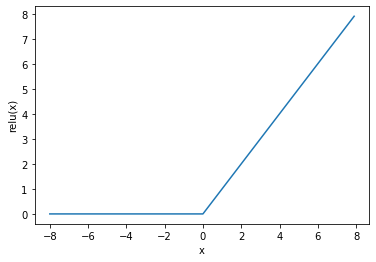

In [4]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu')

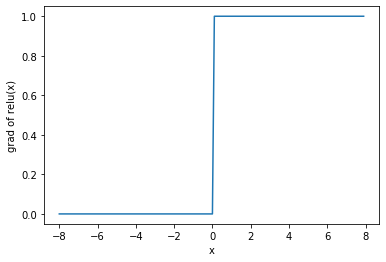

In [5]:
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')
# 梯度要么是0，要么是1

## Sigmoid

$\text{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$

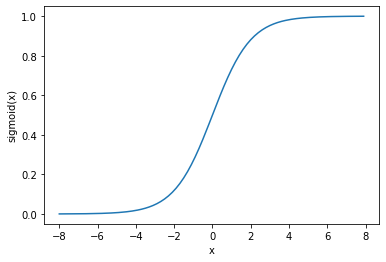

In [6]:
y = x.sigmoid()
xyplot(x, y, 'sigmoid')

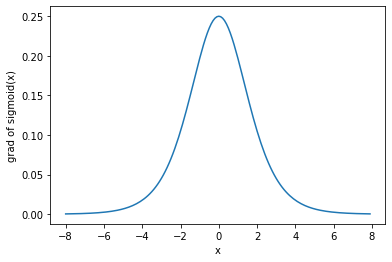

In [7]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')

# 引入激活函数的多层神经网络

$\begin{aligned} \boldsymbol{H} &= \phi(\boldsymbol{X} \boldsymbol{W}_h + \boldsymbol{b}_h),\\ \boldsymbol{O} &= \boldsymbol{H} \boldsymbol{W}_o + \boldsymbol{b}_o, \end{aligned}$